# Comparing ID3 and CS4.5 Learning Algorithms implemented in Python

## Introduction

### Motivation

In order to deeply understand the concepts involved as well as Compare these Algorithms, 
I will implement them each as a Class in base Python, train them on a sample Dataset and compare their learning rates,
both graphically and with some key metrics (training time, accuracy, further metrics to be determined later).

### Scope 
I will not define basic Concepts such Machine Learning and Decision Trees here.
Finally, I consider the history of these Algorithms out of scope here.

Even though this is not a purely or even predominantly mathematical Project I _will_ introduce the Algorithms briefly,
both in order to improve my own understanding and to provide context.

### Key Concepts

#### Entropy
Having been very well defined elsewhere, I think about __Entropy__ in this specific context 
as the degree to which the varying outcomes of a probabilistic process are unbalanced.

Simply put, a system has maximum entropy when all the outcomes are equally likely 
(think randomly picking a number from 1-100 where each numbers' probability of being chosen is 1%)
and approaches zero entropy as an outcome becomes increasingly certain. 

> Formally: Given a random variable $X$, with possible outcomes $x_{i}$, each with probability $P_{X}(x_{i})$ 
> the entropy $H(X)$ is as follows
> $$ H(x) = P_x(x_i) *  log_b P_x(x_i) $$
> 
>source: [wikikpedia](https://en.wikipedia.org/wiki/Entropy_(information_theory))
> 
>the base $b$ is usually set at 2 for this specific case, representing a "choice" between 2 outcomes 

By this Token, the Entropy of picking a random Number between 1-100 can be calculated as


In [2]:
from math import log


probabilities = [.01] * 100
entropy_example = -sum([i * log(.01, 2) for i in probs])
entropy_example

6.6438561897747395

graphically, let's look how entropy behaves in the most simple case from maximum to minimum:

We start out with an equal coin toss with likelihood of 50 | 50 (maximum entropy) 
and end up with a perfectly unfair coin toss: 0 | 1

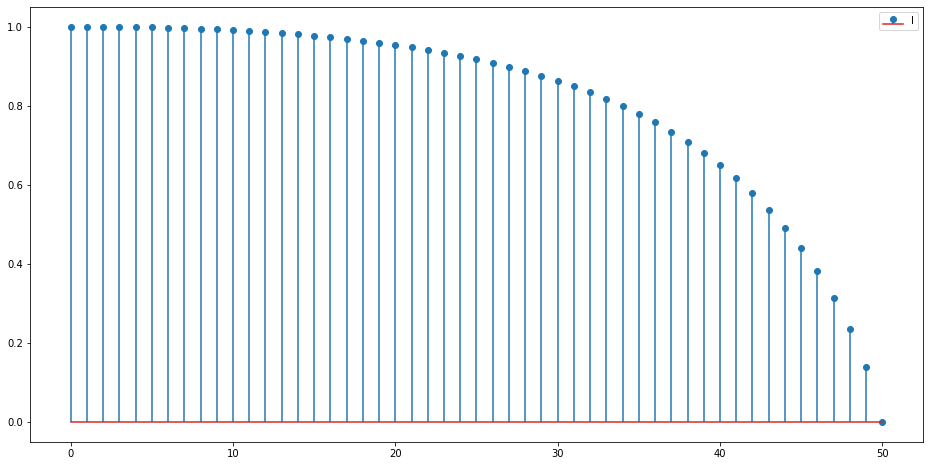

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import entropy


heads = .5
tails = 1 - heads

# we shift the likelihoods over from 0.5 - 0 and calculate entropy at each point
# this time we use the entropy function from scipy
# this could be vectorized with numpy, but at a list of this size...
entropies = [entropy([(heads - i), tails], base=2) for i in [j * 0.01 for j in range(51)]]

plt.figure(figsize=(16,8))
plt.stem(range(51),entropies, use_line_collection=True)
plt.legend('likelihood of a coin toss - from equal to unfair, in steps of 1%')
plt.show()

as we can see, this looks like a classic logarithmic curve

#### Information Gain
The opposing side of Entropy, Information Gain is concerned with how much knowledge of a feature 
decreases the Entropy of a system, or makes the outcome more deterministic.

## The Iterative Dichotomiser 3 (ID3) Algorithm

